<a href="https://colab.research.google.com/github/IshaPerry/womens-health-access-USA/blob/main/Women's_Health_Access_Data_(2019_2020%2C_2022).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Initial Data Collection </h1>

Source 1: <b> CDC </b>

https://www.cdc.gov/mmwr/volumes/70/ss/ss7009a1.htm#T2_down

Source 2: <b> NY Times </b>

https://www.nytimes.com/interactive/2022/us/abortion-laws-roe-v-wade.html

Source 3: <b> Guttmacher Institute </b>

https://data.guttmacher.org/states/table?state=AL+AK+AZ+AR+CA+CO+CT+DE+DC+FL+GA+HI+ID+IL+IN+IA+KS+KY+LA+ME+MD+MA+MI+MN+MS+MO+MT+NE+NV+NH+NJ+NM+NY+NC+ND+OH+OK+OR+PA+RI+SC+SD+TN+TX+UT+VT+VA+WA+WV+WI+WY&topics=66&dataset=data


In [1]:
def abortion_data_parser():
  from pandas._libs.algos import diff_2d
  #imports necessarily to scrape the webpage using selenium
  import sys
  sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
  from selenium import webdriver
  from selenium.webdriver.common.by import By
  import pandas as pd

  #set up selenium Chrome webdriver 
  chrome_options = webdriver.ChromeOptions()
  chrome_options.add_argument('--headless')
  chrome_options.add_argument('--no-sandbox')
  chrome_options.add_argument('--disable-dev-shm-usage')
  wd = webdriver.Chrome('chromedriver',options=chrome_options)

  #retrieve and load webpage
  wd.get("https://www.cdc.gov/mmwr/volumes/70/ss/ss7009a1.htm#T2_down")
  wd.maximize_window()
  wd.implicitly_wait(500)


  #Create list containing state names, number of abortions, and number of abortions obtained by out of rate residents 
  states = [state.text for state in wd.find_elements(By.XPATH, f"/html/body/div[6]/main/div[3]/div/div[3]\
  /div/div[34]/table/tbody/tr/td[1]")]
  states.pop()

  number_of_abortions = [float(abortion_no.text.replace(',','')) for abortion_no in wd.find_elements(By.XPATH, f"/html/body/div[6]/main/\
  div[3]/div/div[3]/div/div[34]/table/tbody/tr/td[2]")]
  number_of_abortions.pop()

 
  non_resident_abortions = [outside_abortion_no.text.partition(" ")[0] for outside_abortion_no in wd.find_elements(By.XPATH, f"/ht\
  ml/body/div[6]/main/div[3]/div/div[3]/div/div[34]/table/tbody/tr/td[5]")]
  non_resident_abortions.pop()
  non_resident_abortions = [float(num.replace(',','')) for num in non_resident_abortions]

  #Create Pandas Dataframe
  Table_1_Data = {"States": states, "# of Abortions in 2019": number_of_abortions, 
                  "# of Out-of-State Resident Abortion": non_resident_abortions}
  State_Abortion_Data = pd.DataFrame(Table_1_Data).set_index("States")



  return State_Abortion_Data
  


  
#Function Call 
abortion_data_parser()

#Note: California, Marlyand, and New Hampshire do not collect abortion Data 

,# of Abortions in 2019,# of Out-of-State Resident Abortion
States,,
Alabama,6009.0,1040.0
Alaska,1270.0,19.0
Arizona,13097.0,67.0
Arkansas,2963.0,338.0
Colorado,9002.0,946.0
Connecticut,9202.0,334.0
Delaware,2042.0,277.0
District of Columbia,4552.0,3126.0
Florida,71914.0,2256.0


In [2]:
def law_parser():
  from pandas._libs.algos import diff_2d
  #imports necessarily to scrape the webpage using selenium
  import sys
  sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
  from selenium import webdriver
  from selenium.webdriver.common.by import By
  import pandas as pd

  #set up selenium Chrome webdriver 
  chrome_options = webdriver.ChromeOptions()
  chrome_options.add_argument('--headless')
  chrome_options.add_argument('--no-sandbox')
  chrome_options.add_argument('--disable-dev-shm-usage')
  wd = webdriver.Chrome('chromedriver',options=chrome_options)

  #retrieve and load webpage
  wd.get("https://www.nytimes.com/interactive/2022/us/abortion-laws-roe-v-wade.html")
  wd.maximize_window()
  wd.implicitly_wait(500)

  #Retrieve state and current (August 2022) abortion status 
  states = [state.text for state in wd.find_elements(By.XPATH, "//*[@id='g-search-table']/tbody/tr/td[1]/div[1]")]
  status = [status.text for status in wd.find_elements(By.XPATH, "//*[@id='g-search-table']/tbody/tr/td[2]/div")]
  
  #Create Pandas Data Frame 
  Legal_Data = {"States": states, "Abortion Status": status}
  df = pd.DataFrame(Legal_Data)

  return df


#Function Call 
law_parser()







,States,Abortion Status
0,Alabama,Banned
1,Arkansas,Banned
2,Idaho,Banned
3,Kentucky,Banned
4,Louisiana,Banned
5,Mississippi,Banned
6,Missouri,Banned
7,Oklahoma,Banned
8,South Dakota,Banned
9,Tennessee,Banned


In [3]:
def abortion_data_parser2():
  from pandas._libs.algos import diff_2d
  #imports necessarily to scrape the webpage using selenium
  import sys
  sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
  from selenium import webdriver
  from selenium.webdriver.common.by import By
  import pandas as pd

  #set up selenium Chrome webdriver 
  chrome_options = webdriver.ChromeOptions()
  chrome_options.add_argument('--headless')
  chrome_options.add_argument('--no-sandbox')
  chrome_options.add_argument('--disable-dev-shm-usage')
  wd = webdriver.Chrome('chromedriver',options=chrome_options)

  #retrieve and load webpage
  wd.get("https://data.guttmacher.org/states/table?state=AL+AK+AZ+AR+CA+CO+CT+DE+DC+FL+GA+HI+ID+IL+IN+IA+KS+KY+LA+ME+MD+MA+MI+\
  MN+MS+MO+MT+NE+NV+NH+NJ+NM+NY+NC+ND+OH+OK+OR+PA+RI+SC+SD+TN+TX+UT+VT+VA+WA+WV+WI+WY&topics=66&dataset=data")
  wd.maximize_window()
  wd.implicitly_wait(500)

  #Retrieve state and abortion data 
  states = [state.text for state in wd.find_elements(By.XPATH, "//*[@id='tableWrapper']/div[1]/table/tbody/tr/td[1]")]
  no_of_abortions = [float(abortion_no.text.replace(",", "")) for abortion_no in wd.find_elements(By.XPATH, "//*[@id='tableWrapper']/\
  div[1]/table/tbody/tr/td[2]/span/span[1]")]


  #Create Pandas DataFrame 
  data_dict = {"States": states, "# of Abortions in 2020": no_of_abortions}
  df = pd.DataFrame(data_dict)


  return df

#Function Call
abortion_data_parser2()

,States,# of Abortions in 2020
0,Alabama,5700.0
1,Alaska,1240.0
2,Arizona,13320.0
3,Arkansas,3250.0
4,California,154060.0
5,Colorado,13420.0
6,Connecticut,11170.0
7,Delaware,1830.0
8,District of Columbia,9410.0
9,Florida,77400.0


# <h> Data Aggregation </h> 

In [7]:
from google.colab import data_table
data_table.disable_dataframe_formatter()
import pandas as pd 
pd.options.mode.chained_assignment = None



def top_states():
  abortion_df_2019 = abortion_data_parser()
  abortion_df_2020 = abortion_data_parser2()
  abortion_status = law_parser()

  merged_df = pd.merge(abortion_df_2019, abortion_df_2020, on="States")
  merged_df["Abortion Status"] = abortion_status[["Abortion Status"]]
  abortion_trends = merged_df[['States', '# of Abortions in 2019','# of Abortions in 2020', 'Abortion Status']]

  
  #Calculate % change in abortion from 2019 - 2020, by state
  abortion_trends["% Change in # of Abortions"] = round(((abortion_trends['# of Abortions in 2020'] - abortion_trends[
      '# of Abortions in 2019'])/abortion_trends['# of Abortions in 2019'])*100, 2)

  #Display top 10 states, based on % change in abortion 
  top_10_increase = abortion_trends.nlargest(n = 20, columns = "% Change in # of Abortions").set_index("States")
  

  return top_10_increase

#Function Call 
top_states()

,# of Abortions in 2019,# of Abortions in 2020,Abortion Status,% Change in # of Abortions
States,,,,
Wyoming,31.0,100.0,Legal,222.58
District of Columbia,4552.0,9410.0,Banned,106.72
Oklahoma,4995.0,9690.0,Legal but limited,93.99
Hawaii,2003.0,3130.0,Banned,56.27
New Mexico,3942.0,5880.0,Legal but limited,49.16
Colorado,9002.0,13420.0,Banned,49.08
New York,78587.0,110360.0,Legal but limited,40.43
Rhode Island,2099.0,2760.0,Legal but limited,31.49
Nevada,8414.0,11010.0,Legal but limited,30.85


In [8]:
import pandas as pd

def non_resident_abortion():  
  
  df = abortion_data_parser()
  df2 = law_parser()

  merged_df = pd.merge(df, df2, on="States")

  #Calculate the % of total abortions from of out-of-state residents 
  merged_df['% of Abortions by Out-of-State Residents'] = round((merged_df['# of Out-of-State Resident Abortion']/
                                                                 merged_df['# of Abortions in 2019'])*100, 2)

  top_10_non_resident_locations = merged_df.nlargest(n = 10, columns = "% of Abortions by Out-of-State Residents").set_index("States")
  top_10_non_resident_locations = top_10_non_resident_locations[["% of Abortions by Out-of-State Residents", "Abortion Status"]]

  return top_10_non_resident_locations


#Function Call 
non_resident_abortion()

,% of Abortions by Out-of-State Residents,Abortion Status
States,,
Kansas,48.91,Legal but limited
North Dakota,25.78,Ban blocked
New Mexico,23.82,Legal
Vermont,22.18,Legal
South Dakota,19.81,Banned
Tennessee,18.76,Banned
North Carolina,17.85,Gestational limit
Georgia,17.61,Gestational limit
Kentucky,17.55,Banned


In [9]:
import pandas as pd

def nationwide_abortion_percentages(): 
  abortion_df_2019 = abortion_data_parser()
  abortion_df_2020 = abortion_data_parser2()
  merged_df = pd.merge(abortion_df_2019, abortion_df_2020, on="States")

  total_abortions_2019 = merged_df['# of Abortions in 2019'].sum()
  total_abortions_2020 =  merged_df['# of Abortions in 2020'].sum()
  
  merged_df['% of Total Nationwide Abortions, 2019'] = round(merged_df['# of Abortions in 2019']/total_abortions_2019 * 100, 2)
  merged_df['% of Total Nationwide Abortions, 2020'] = round(merged_df['# of Abortions in 2020']/total_abortions_2020 * 100, 2)
  return merged_df

#Function Call 
nationwide_abortion_percentages()

,States,# of Abortions in 2019,# of Out-of-State Resident Abortion,# of Abortions in 2020,"% of Total Nationwide Abortions, 2019","% of Total Nationwide Abortions, 2020"
0,Alabama,6009.0,1040.0,5700.0,0.99,0.82
1,Alaska,1270.0,19.0,1240.0,0.21,0.18
2,Arizona,13097.0,67.0,13320.0,2.16,1.92
3,Arkansas,2963.0,338.0,3250.0,0.49,0.47
4,Colorado,9002.0,946.0,13420.0,1.48,1.93
5,Connecticut,9202.0,334.0,11170.0,1.51,1.61
6,Delaware,2042.0,277.0,1830.0,0.34,0.26
7,District of Columbia,4552.0,3126.0,9410.0,0.75,1.35
8,Florida,71914.0,2256.0,77400.0,11.83,11.15
9,Georgia,36907.0,6500.0,41620.0,6.07,5.99


# <h> Data Visualizations </h> 

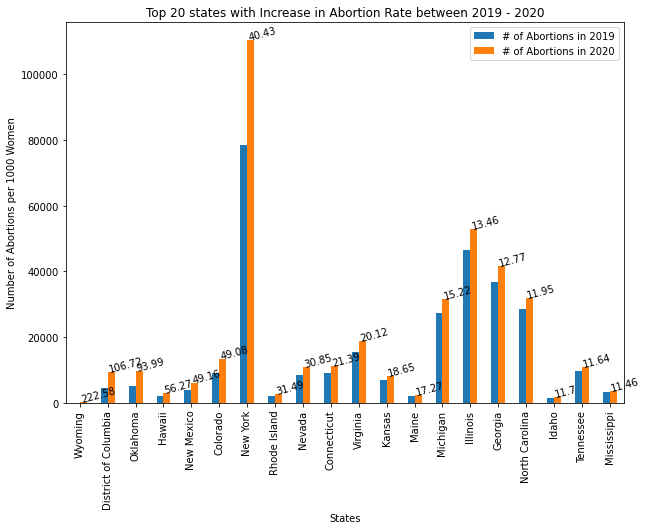

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd 

def increase_in_abortion_rates(): 
  df = top_states()
  plot = df.plot(y = ["# of Abortions in 2019", "# of Abortions in 2020"], kind = "bar", figsize = (10, 7))
  plot.set_ylabel("Number of Abortions per 1000 Women")
  plot.set_title("Top 20 states with Increase in Abortion Rate between 2019 - 2020")
  
  df_splice = df["% Change in # of Abortions"]
  
  for index, increase in enumerate(df_splice):
    plt.text(index, df["# of Abortions in 2020"][index], str(increase), rotation = 15)

  plt.show()

#Function Call
increase_in_abortion_rates()

In [9]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import warnings




def abortion_increase_map():
  warnings.filterwarnings('ignore')
  #Obtain dataframes from data initialization phase
  abortion_df_2019 = abortion_data_parser()
  abortion_df_2020 = abortion_data_parser2()
  abortion_status = law_parser()

 
  merged_df = pd.merge(abortion_df_2019, abortion_df_2020, on="States")
  merged_df["Abortion Status"] = abortion_status[["Abortion Status"]]
  merged_df["% Change in # of Abortions"] = round(((merged_df['# of Abortions in 2020'] - merged_df['# of Abortions in 2019'])/merged_df['# of Abortions in 2019'])*100, 2)
  abortion_trends = merged_df[['States', 'Abortion Status', "% Change in # of Abortions"]]
 
  
  #Set state codes to utilize plotly 
  state_code = {'Alabama': 'AL', 'Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','Colorado': 'CO', 
                'Connecticut': 'CT','Delaware': 'DE', 'District of Columbia': 'DC','Florida': 'FL',
                'Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 
                'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA', 'Maine': 'ME', 
                'Massachusetts': 'MA','Michigan': 'MI', 'Minnesota': 'MN','Mississippi': 'MS', 
                'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Mexico': 'NM',
                'New York': 'NY', 'North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH', 
                'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 
                'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 
                'Utah': 'UT', 'Vermont': 'VT','Virginia': 'VA', 'Washington': 'WA','West Virginia': 
                'WV','Wisconsin': 'WI','Wyoming': 'WY'}
    
  df2 = pd.DataFrame([state_code]).T
  df2 = df2.reset_index()
  abortion_trends['States'] = df2['index'].apply(lambda x: state_code[x])

  #Create plotly chloropleth map 
  fig = px.choropleth(abortion_trends, locations=abortion_trends["States"], locationmode='USA-states', scope='usa', 
                      color='% Change in # of Abortions', color_continuous_scale='dense')
  fig.update_layout(title_text = "Change in Abortions from 2019 to 2020")
 
  fig.show()
 
 





#Function Call
abortion_increase_map()

## **Image from Plotly/abortion_increase_map() function shown below**


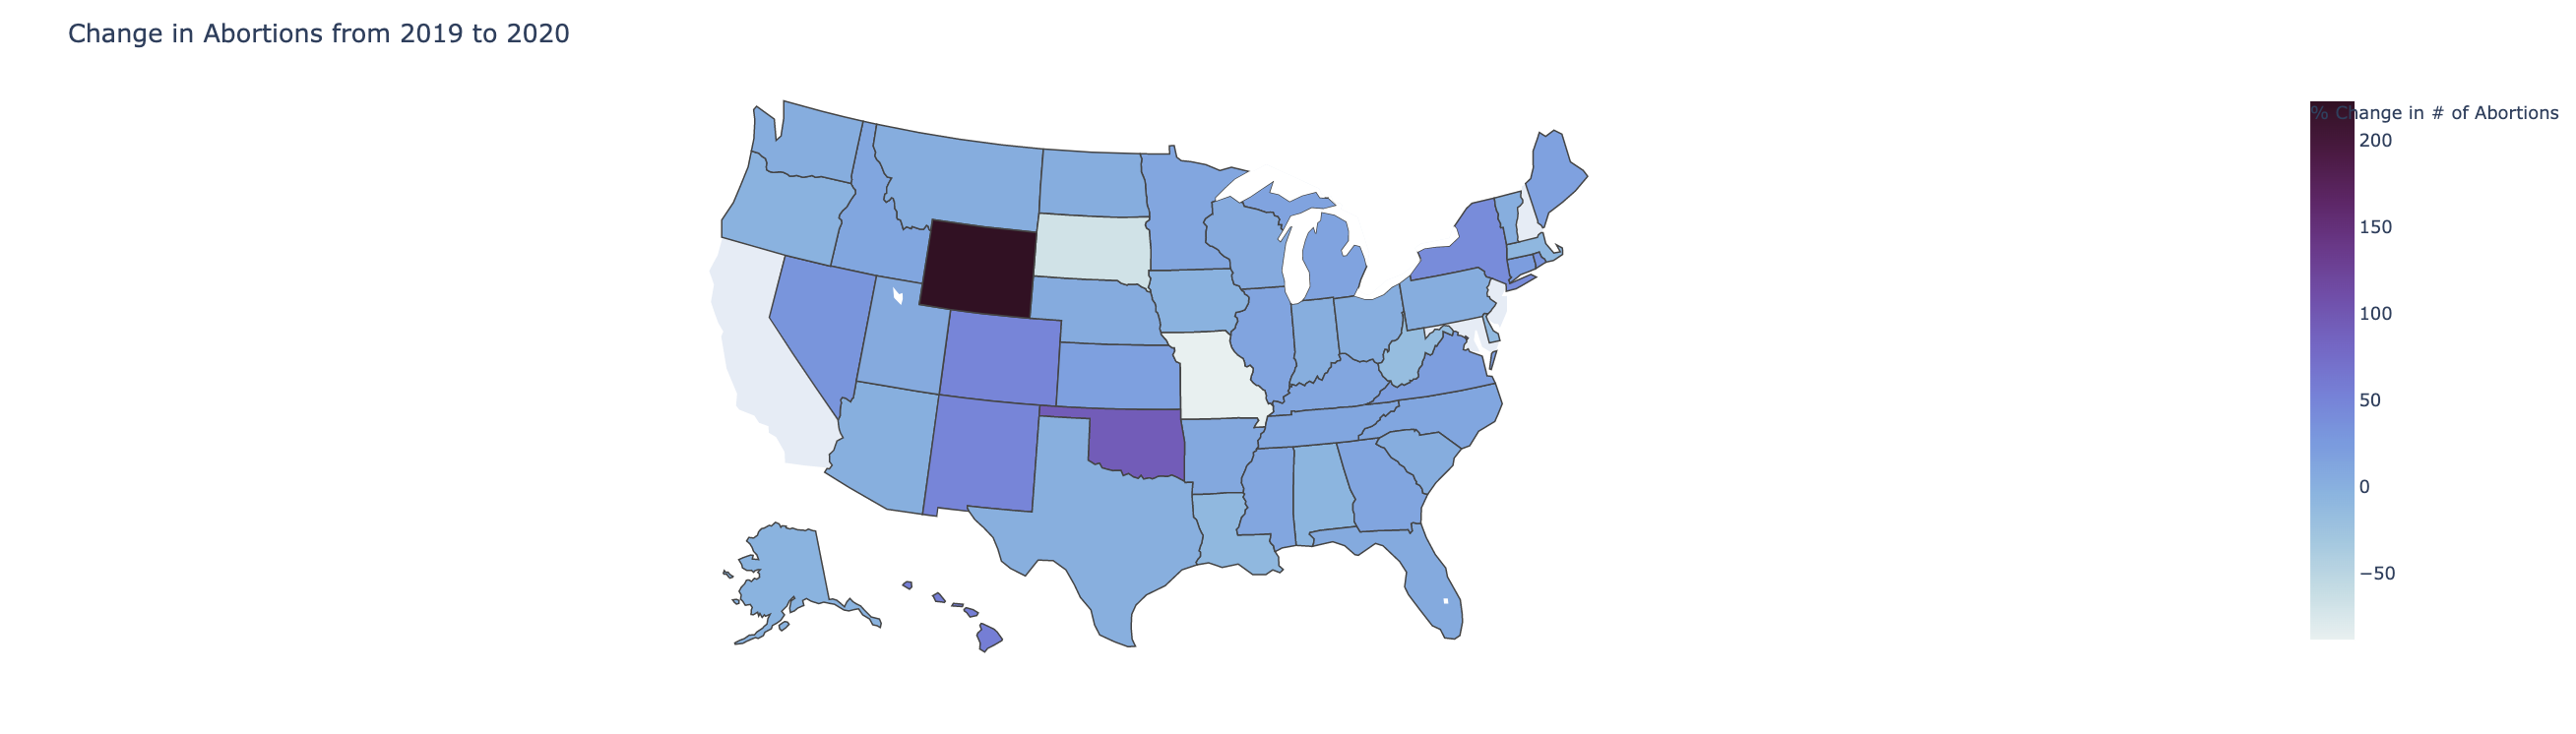


\

In [10]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import warnings



def non_resident_abortions(): 
  warnings.filterwarnings('ignore')
  df1 = abortion_data_parser()

  df2 = law_parser()

  merged_df = pd.merge(df1, df2, on="States")

  #Calculate the % of total abortions from of out-of-state residents 
  merged_df['% of Abortions by Out-of-State Residents'] = round((merged_df['# of Out-of-State Resident Abortion']/merged_df['# of Abortions in 2019'])*100, 2)

  df = merged_df[['States', '% of Abortions by Out-of-State Residents']]

  
  state_code = {'Alabama': 'AL', 'Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','Colorado': 
                'CO', 'Connecticut': 'CT','Delaware': 'DE', 'Florida': 'FL','Georgia': 'GA','Hawaii': 'HI',
  'Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY',
  'Louisiana': 'LA', 'Maine': 'ME', 'Massachusetts': 'MA','Michigan': 'MI', 'Minnesota': 'MN',
  'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 
  'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH', 
  'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 
  'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
  'Virginia': 'VA', 'Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}

    
  df2 = pd.DataFrame([state_code]).T
  df2 = df2.reset_index()
  df['States'] = df2['index'].apply(lambda x: state_code[x])


  fig = px.choropleth(df, locations=df["States"], locationmode='USA-states', scope='usa', 
  color='% of Abortions by Out-of-State Residents', color_continuous_scale='darkmint')
  fig.update_layout(title_text = "% of Non-Resident 2019 Abortions by State")
 
  fig.show()

  

  

  

#Function Call 
non_resident_abortions()

## **Image from Plotly/non_resident_abortions() function shown below**

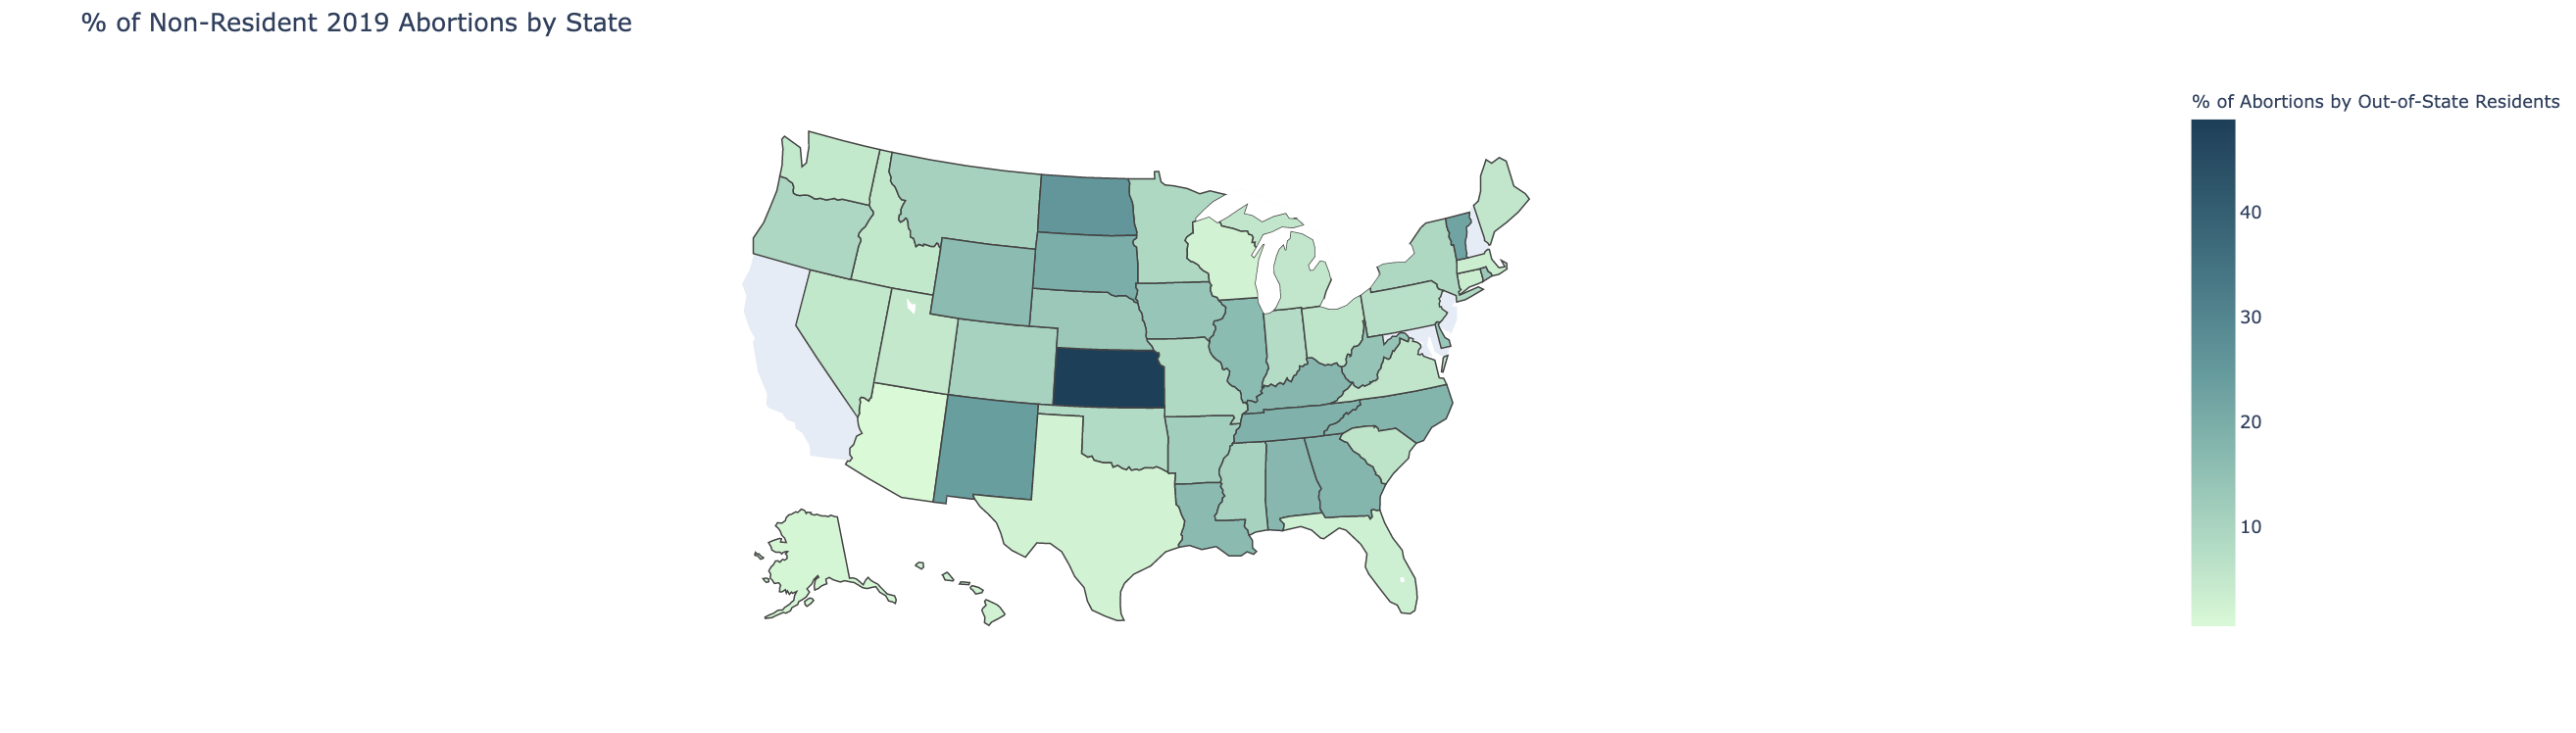

In [7]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

def legal_status(): 

  df = law_parser()
  df = df.sort_values('States')
  df.reset_index(drop=True, inplace=True)


    
  state_code = {'Alabama': 'AL', 'Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR', 'California':'CA', 'Colorado': 'CO', 'Connecticut': 'CT','Delaware': 'DE', 'Florida': 'FL','Georgia': 'GA','Hawaii': 'HI',
  'Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland':'MD', 'Massachusetts': 'MA','Michigan': 'MI', 'Minnesota': 'MN',
  'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire':'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC','North Dakota': 'ND',
  'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
  'Virginia': 'VA', 'Washington': 'WA', 'Washington, D.C.': 'DC', 'West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}
    
  df2 = pd.DataFrame([state_code]).T
  df2 = df2.reset_index()
  df['States'] = df2['index'].apply(lambda x: state_code[x])

  banned_mask = df['Abortion Status'] == 'Banned'
  legal_mask = df['Abortion Status'] == 'Legal'
  block_mask = df['Abortion Status'] == 'Ban blocked'
  limited_mask = df['Abortion Status'] == 'Legal but limited'
  gestational_mask = df['Abortion Status'] == 'Gestational limit'
  coming_mask = df['Abortion Status'] == 'Ban coming'

  df_banned = df[banned_mask]
  df_legal = df[legal_mask]
  df_block = df[block_mask]
  df_limited = df[limited_mask]
  df_gestational = df[gestational_mask]
  df_coming = df[coming_mask]
  
  fig2 = px.choropleth(df_banned, locations=df_banned["States"], locationmode='USA-states', scope='usa', color='Abortion Status', color_discrete_sequence = ['Red'])
  fig2.update_layout(title_text = "States where Abortion is Banned", showlegend= False)
  fig2.show()

  fig3 = px.choropleth(df_legal, locations=df_legal["States"], locationmode='USA-states', scope='usa', color='Abortion Status', color_discrete_sequence = ['Green'])
  fig3.update_layout(title_text = "States where Abortion is Legal", showlegend = False)
  fig3.show()

  fig4 = px.choropleth(df_block, locations=df_block["States"], locationmode='USA-states', scope='usa', color='Abortion Status', color_discrete_sequence = ['Blue'])
  fig4.update_layout(title_text = "States where an Abortion Ban was Blocked", showlegend = False )
  fig4.show()

  fig5 = px.choropleth(df_limited, locations=df_limited["States"], locationmode='USA-states', scope='usa', color='Abortion Status', color_discrete_sequence = ['Orange'])
  fig5.update_layout(title_text = "States where Abortion Access is Limited", showlegend = False )
  fig5.show()

  fig6 = px.choropleth(df_gestational, locations=df_gestational["States"], locationmode='USA-states', scope='usa', color='Abortion Status', color_discrete_sequence = ['Purple'])
  fig6.update_layout(title_text = "States with a Gestational Limit on Abortion", showlegend = False )
  fig6.show()

  fig7 = px.choropleth(df_coming, locations=df_coming["States"], locationmode='USA-states', scope='usa', color='Abortion Status', color_discrete_sequence = ['Yellow'])
  fig7.update_layout(title_text = "State(s) where an Abortion Ban is Likely Coming", showlegend = False )
  fig7.show()
  
  fig = px.choropleth(df, locations=df["States"], locationmode='USA-states', scope='usa', color='Abortion Status', color_discrete_sequence = ['Red', 'Green', 'Blue', 'Orange', 'Purple', 'Yellow'])
  fig.update_layout(title_text = "Abortion Status by State")
  fig.show()





 


legal_status()

## **Images from Plotly/legal_status() function shown below**

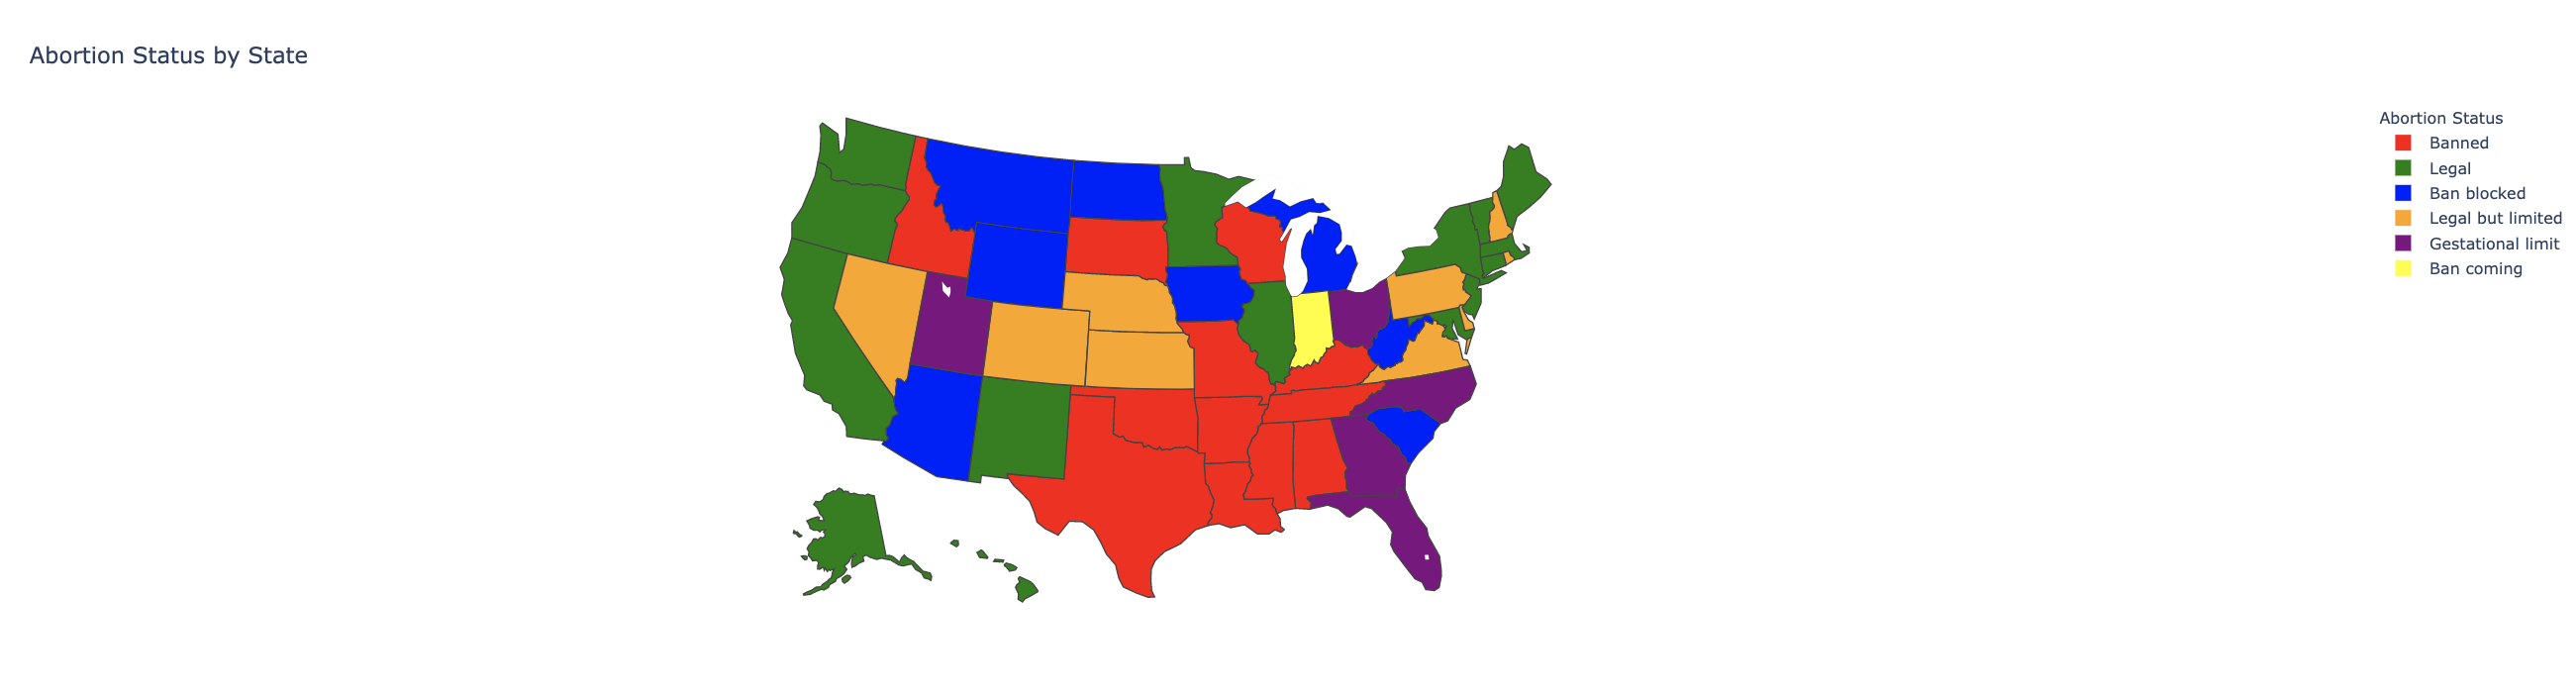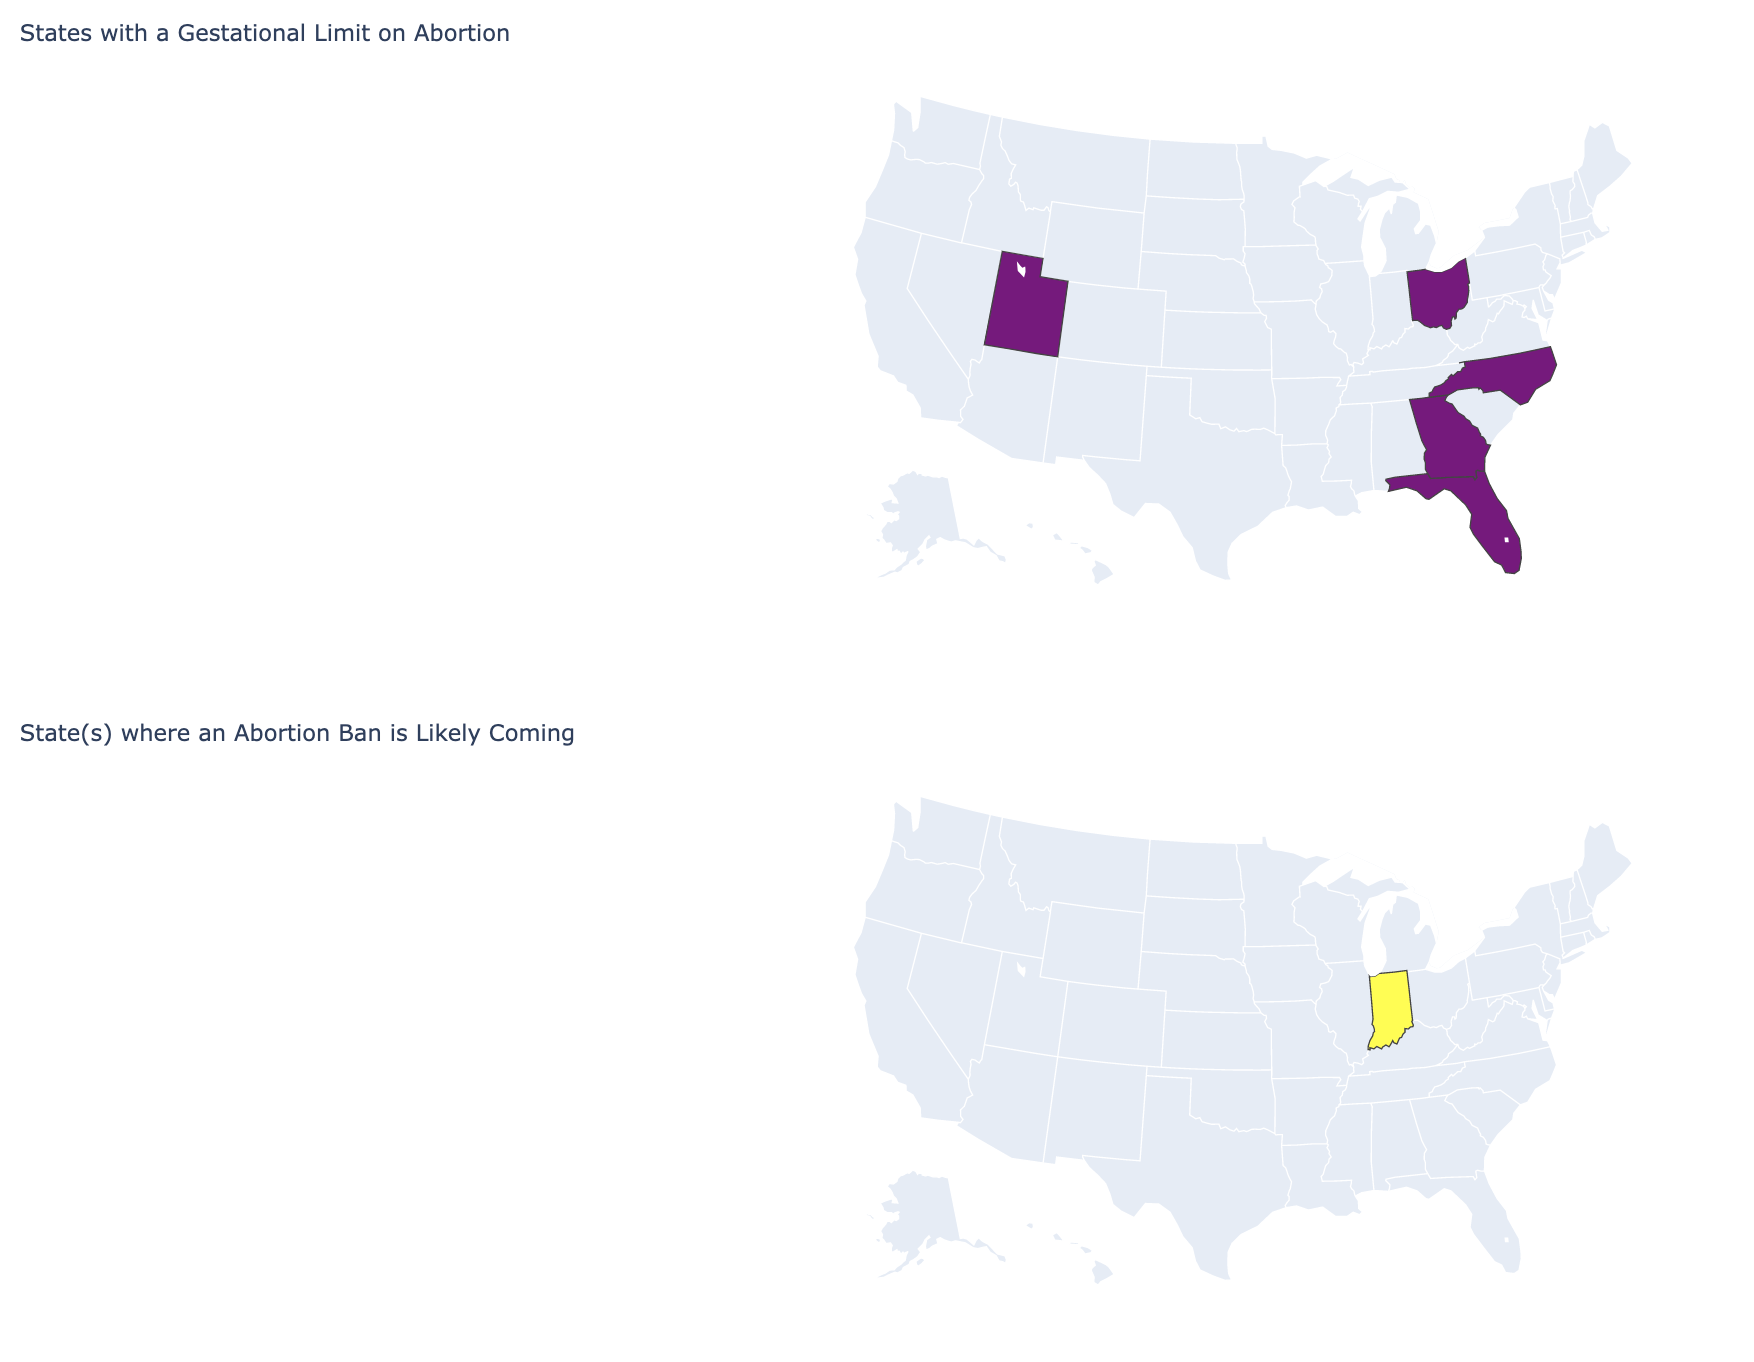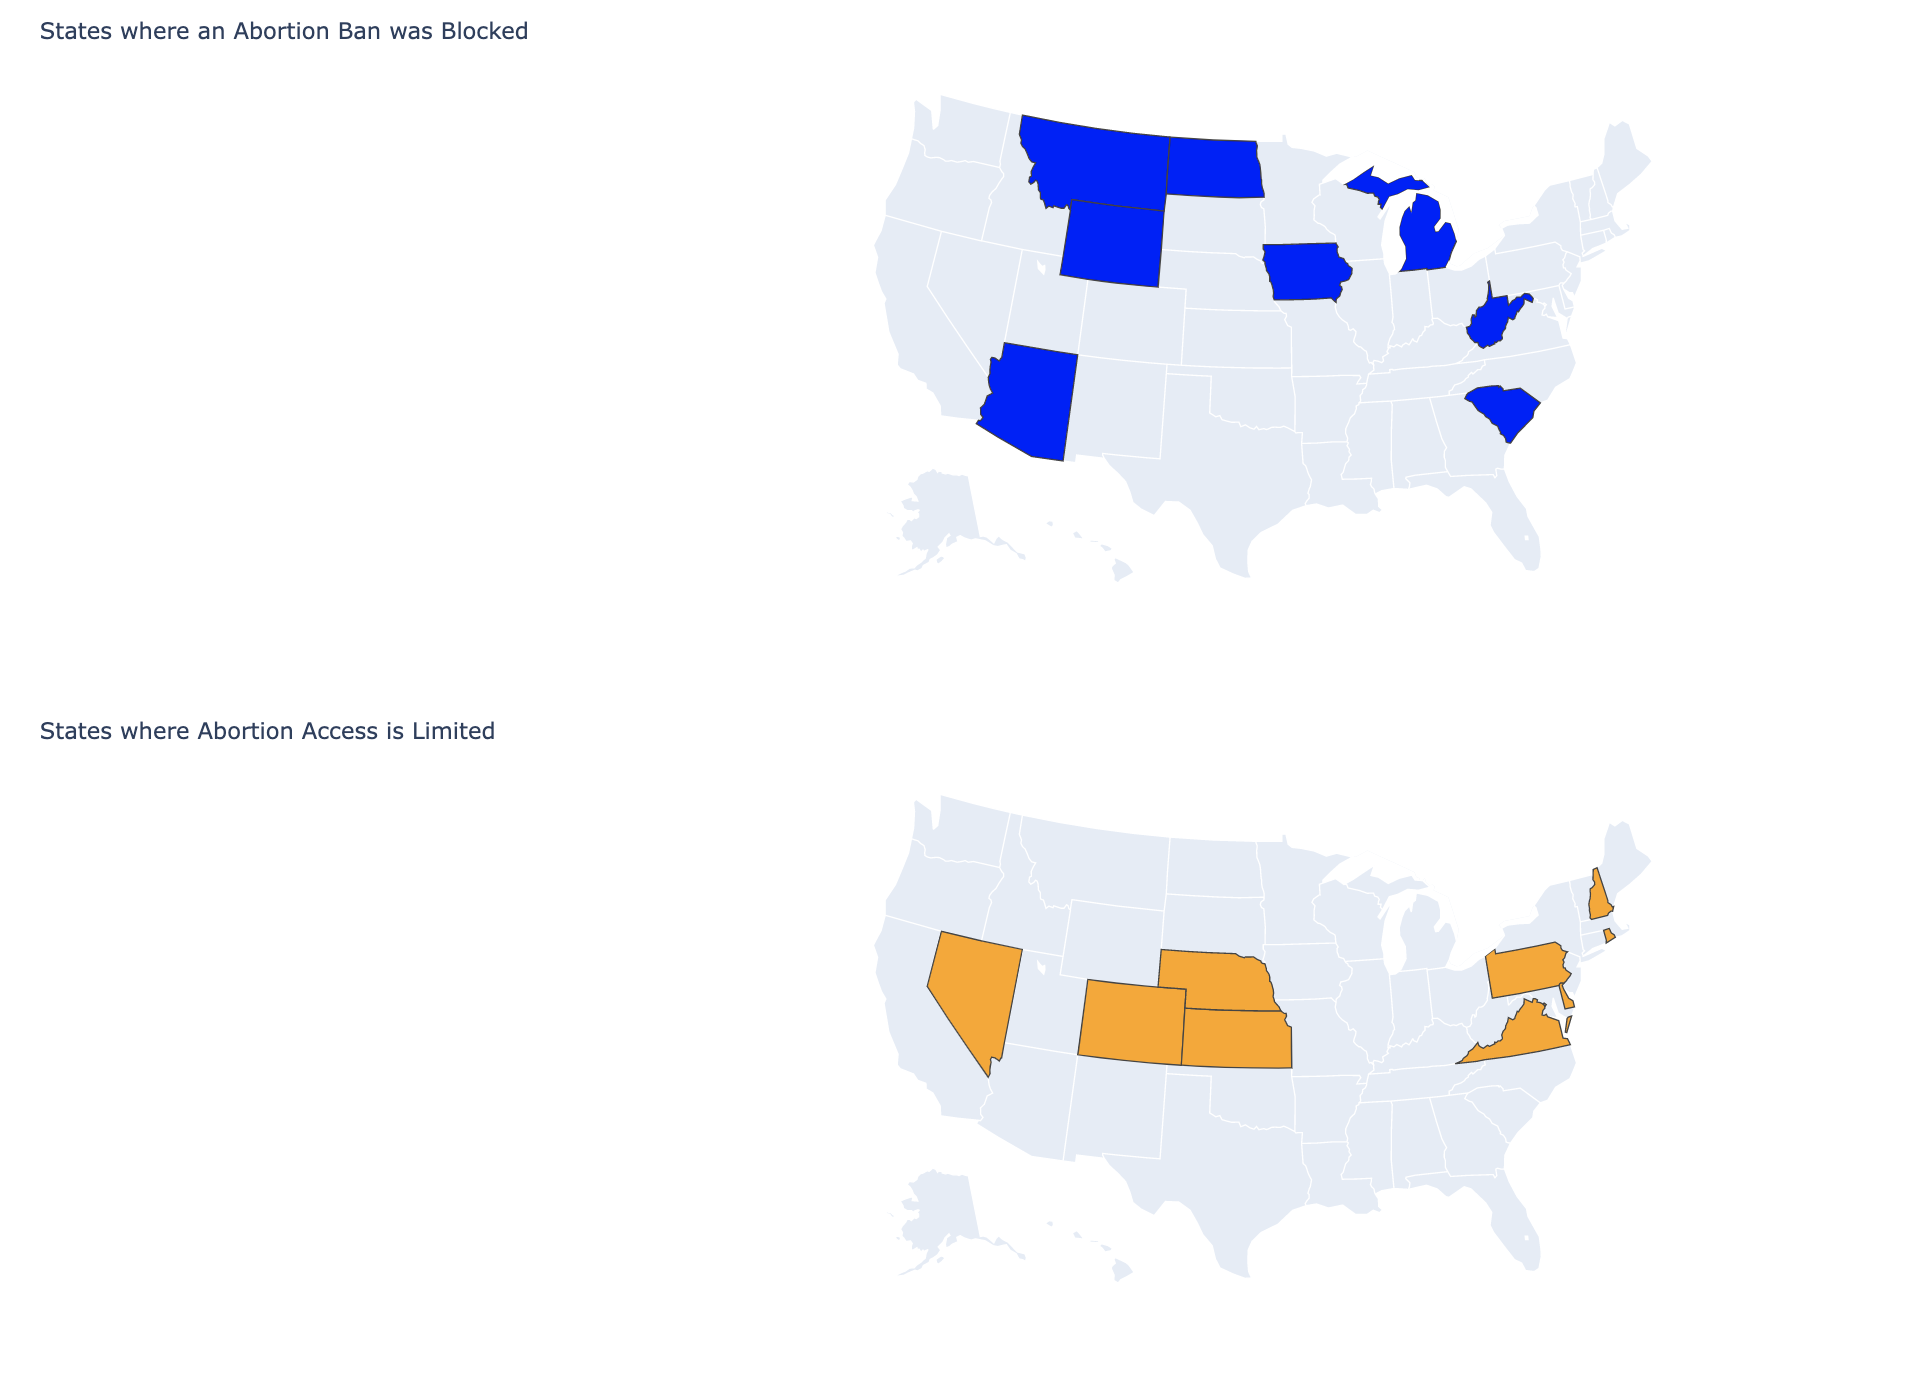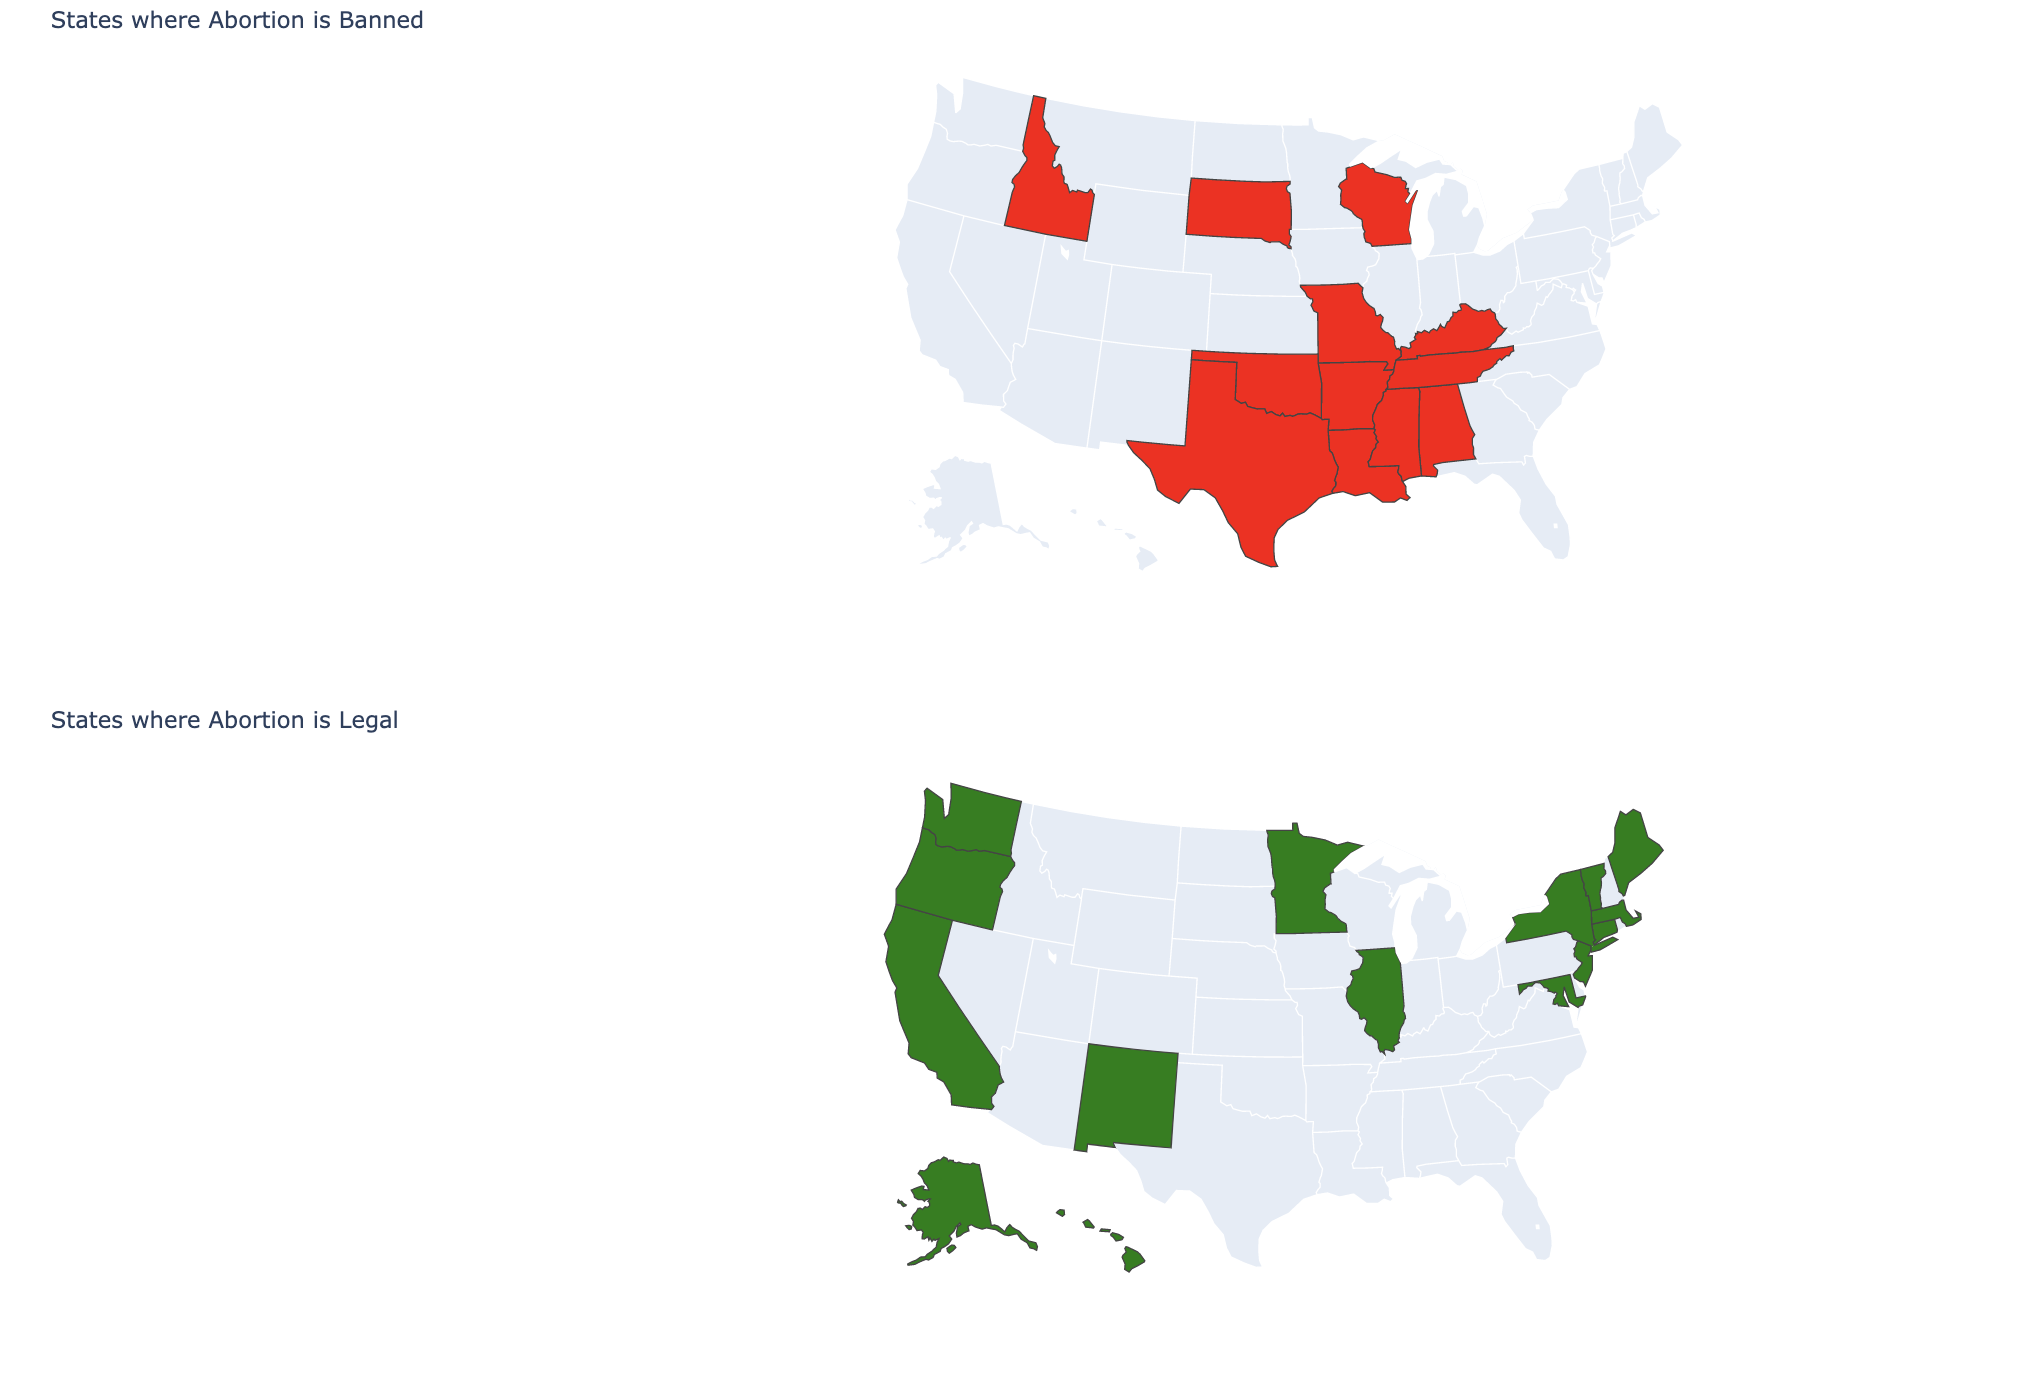